<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(2_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,28.421235,30.339931,76.869541,100.943278,246.573985,141.344439,105.229546
1,0.0,1.0,73.106901,92.836634,24.910389,228.343777,429.197701,227.520606,201.677094
2,0.0,2.0,59.131845,46.884073,95.799568,1.371031,213.186517,212.322114,0.864403
3,0.0,3.0,79.733237,45.043266,96.314913,219.197519,450.288936,220.495321,229.793614
4,0.0,4.0,58.314355,53.207929,82.639557,-7.165339,196.996502,208.976928,-11.980426
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,31.541276,64.154404,38.123946,-342.490434,-198.670808,130.373667,-329.044475
119996,999.0,116.0,76.971619,35.855042,62.583113,55.763729,241.173502,187.967147,53.206356
119997,999.0,117.0,72.242771,75.855468,69.144730,-158.812055,68.430914,242.491585,-174.060671
119998,999.0,118.0,70.933358,39.839333,70.291130,204.131379,395.195200,196.269120,198.926080


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,28.421235,30.339931,76.869541,100.943278,246.573985,141.344439,105.229546
1,0.0,1.0,73.106901,92.836634,24.910389,228.343777,429.197701,227.520606,201.677094
2,0.0,2.0,59.131845,46.884073,95.799568,1.371031,213.186517,212.322114,0.864403
3,0.0,3.0,79.733237,45.043266,96.314913,219.197519,450.288936,220.495321,229.793614
4,0.0,4.0,58.314355,53.207929,82.639557,-7.165339,196.996502,208.976928,-11.980426
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,31.541276,64.154404,38.123946,-342.490434,-198.670808,130.373667,-329.044475
119996,999.0,116.0,76.971619,35.855042,62.583113,55.763729,241.173502,187.967147,53.206356
119997,999.0,117.0,72.242771,75.855468,69.144730,-158.812055,68.430914,242.491585,-174.060671
119998,999.0,118.0,70.933358,39.839333,70.291130,204.131379,395.195200,196.269120,198.926080


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    28.421235  30.339931  ...  141.344439  105.229546
      1.0    73.106901  92.836634  ...  227.520606  201.677094
      2.0    59.131845  46.884073  ...  212.322114    0.864403
      3.0    79.733237  45.043266  ...  220.495321  229.793614
      4.0    58.314355  53.207929  ...  208.976928  -11.980426
...                ...        ...  ...         ...         ...
999.0 115.0  31.541276  64.154404  ...  130.373667 -329.044475
      116.0  76.971619  35.855042  ...  187.967147   53.206356
      117.0  72.242771  75.855468  ...  242.491585 -174.060671
      118.0  70.933358  39.839333  ...  196.269120  198.926080
      119.0  51.278169  75.537990  ...  158.182733  -53.555101

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    28.421235  30.339931  ...  141.344439  105.229546
      1.0    73.106901  92.836634  ...  227.520606  201.677094
      2.0    59.131845  46.884073  ...  212.322114    0.864403
      3.0    79.733237  45.043266  ...  220.495321  229.793614
      4.0    58.314355  53.207929  ...  208.976928  -11.980426
...                ...        ...  ...         ...         ...
999.0 115.0  31.541276  64.154404  ...  130.373667 -329.044475
      116.0  76.971619  35.855042  ...  187.967147   53.206356
      117.0  72.242771  75.855468  ...  242.491585 -174.060671
      118.0  70.933358  39.839333  ...  196.269120  198.926080
      119.0  51.278169  75.537990  ...  158.182733  -53.555101

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,28.421235,30.339931,76.869541,100.943278,246.573985,141.344439,105.229546
1,0.0,1.0,73.106901,92.836634,24.910389,228.343777,429.197701,227.520606,201.677094
2,0.0,2.0,59.131845,46.884073,95.799568,1.371031,213.186517,212.322114,0.864403
3,0.0,3.0,79.733237,45.043266,96.314913,219.197519,450.288936,220.495321,229.793614
4,0.0,4.0,58.314355,53.207929,82.639557,-7.165339,196.996502,208.976928,-11.980426
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,31.541276,64.154404,38.123946,-342.490434,-198.670808,130.373667,-329.044475
119996,999.0,116.0,76.971619,35.855042,62.583113,55.763729,241.173502,187.967147,53.206356
119997,999.0,117.0,72.242771,75.855468,69.144730,-158.812055,68.430914,242.491585,-174.060671
119998,999.0,118.0,70.933358,39.839333,70.291130,204.131379,395.195200,196.269120,198.926080


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    28.421235  30.339931  ...  141.344439  105.229546
      1.0    73.106901  92.836634  ...  227.520606  201.677094
      2.0    59.131845  46.884073  ...  212.322114    0.864403
      3.0    79.733237  45.043266  ...  220.495321  229.793614
      4.0    58.314355  53.207929  ...  208.976928  -11.980426
...                ...        ...  ...         ...         ...
999.0 115.0  31.541276  64.154404  ...  130.373667 -329.044475
      116.0  76.971619  35.855042  ...  187.967147   53.206356
      117.0  72.242771  75.855468  ...  242.491585 -174.060671
      118.0  70.933358  39.839333  ...  196.269120  198.926080
      119.0  51.278169  75.537990  ...  158.182733  -53.555101

[120000 rows x 7 columns]

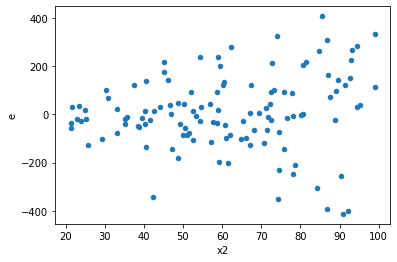

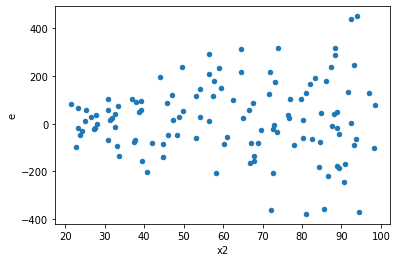

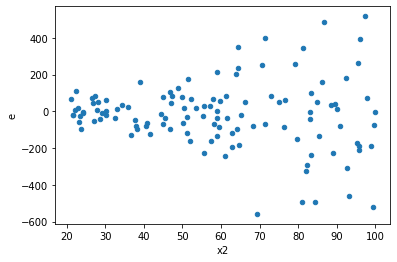

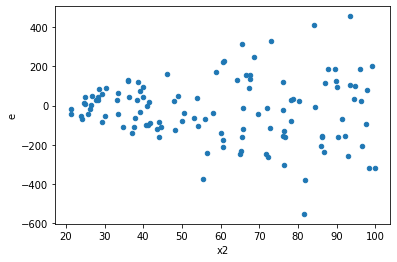

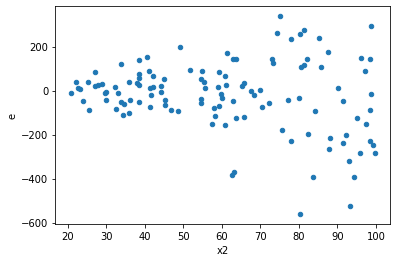

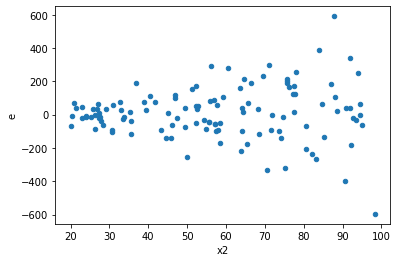

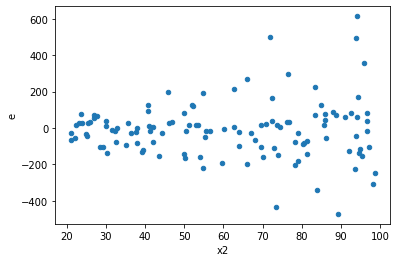

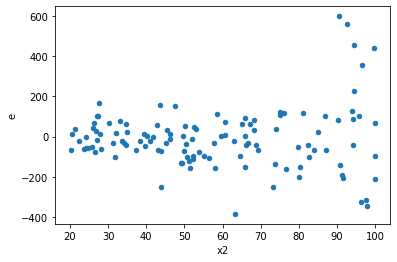

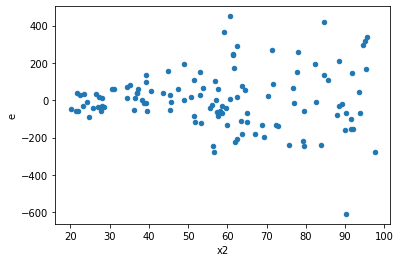

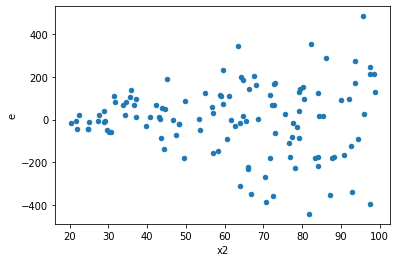

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,400931.39375312644,1834147.9055695315,8909.586527847254,40758.842345989586,4.574717605423805,1.1968365221104449e-06,0.999999401581739,5.984182610552224e-07,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,366154.00789936766,1738193.1108686128,8136.755731097059,38626.513574858065,4.7471639620733885,6.880897913674744e-07,0.9999996559551043,3.440448956837372e-07,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,221063.6583376836,3241001.695795385,4912.525740837413,72022.25990656411,14.660943006944295,1.3322676295501878e-15,0.9999999999999993,6.661338147750939e-16,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,284629.2914805486,1972276.810432468,6325.095366234414,43828.37356516596,6.929282647521372,1.5432959354910736e-09,0.999999999228352,7.716479677455368e-10,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,224474.2180491786,2098026.1440245053,4988.315956648414,46622.803200544564,9.346401391917812,7.615685859718724e-12,0.9999999999961922,3.807842929859362e-12,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,319426.2141191001,2121086.7591148242,7098.36031375778,47135.26131366276,6.640302722067649,3.1835996061602145e-09,0.9999999984082002,1.5917998030801073e-09,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,283802.7638219645,1929131.2814137223,6306.728084932544,42869.58403141605,6.797436555705664,2.141554489298869e-09,0.9999999989292228,1.0707772446494346e-09,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,259869.4030682538,1966322.5390268785,5774.875623738973,43696.05642281952,7.566579658130936,3.3680236377620076e-10,0.9999999998315988,1.6840118188810038e-10,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,177000.3208273817,1880355.965272156,3933.340462830705,41785.68811715902,10.623460773870345,7.047695760320494e-13,0.9999999999996476,3.523847880160247e-13,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,400931.39375312644,1834147.9055695315,8909.586527847254,40758.842345989586,4.574717605423805,1.1968365221104449e-06,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,366154.00789936766,1738193.1108686128,8136.755731097059,38626.513574858065,4.7471639620733885,6.880897913674744e-07,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,221063.6583376836,3241001.695795385,4912.525740837413,72022.25990656411,14.660943006944295,1.3322676295501878e-15,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,284629.2914805486,1972276.810432468,6325.095366234414,43828.37356516596,6.929282647521372,1.5432959354910736e-09,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,224474.2180491786,2098026.1440245053,4988.315956648414,46622.803200544564,9.346401391917812,7.615685859718724e-12,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,319426.2141191001,2121086.7591148242,7098.36031375778,47135.26131366276,6.640302722067649,3.1835996061602145e-09,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,283802.7638219645,1929131.2814137223,6306.728084932544,42869.58403141605,6.797436555705664,2.141554489298869e-09,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,259869.4030682538,1966322.5390268785,5774.875623738973,43696.05642281952,7.566579658130936,3.3680236377620076e-10,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,177000.3208273817,1880355.965272156,3933.340462830705,41785.68811715902,10.623460773870345,7.047695760320494e-13,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    999
Reject001=1 : Homoscedasticity        1
Name: Result_test, dtype: int64